## <center> A1: Data Curation </center>
 <center> Sharmeelee Bijlani </center>
  <center> DATA 512 </center>
 <center> October 4, 2020 </center>

## Tutorial: Timeseries of Pageviews on English Wikipedia
This notebook guides you to gather, process and analyze pageview traffic from the English Wikipedia. The end result of the notebook is a timeseries chart of pageviews from different access types on a monthly basis. 

The source data is licensed and subject to Wikimedia Foundation REST API terms of use: https://www.mediawiki.org/wiki/REST_API#Terms_and_conditions

## Step 1: Gathering the data

We will be using python3 in this notebook. The first step for gathering the data, which is available via APIs, is to import the required packages. The output of this step is five json files, one for each API response. 

In [1]:
import json
import requests

There are two different APIs available for pageviews in the Wikipedia API documentation. One is the legacy API for data from 2007 to 2020. The second is the pageview API for data from 2007 to present. We define both endpoints with variable parameters here. 

In [2]:
# Define parameterized endpoints
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

The following 7 cells below set the parameters for each access type within each API. 

In [3]:
# Parameters for getting aggregated legacy view data for desktop-site pagecount
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2020080100"
                    }

In [4]:
# Parameters for getting aggregated legacy view data for mobile-site pagecount
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2020080100"
                    }

In [5]:
# Parameters for getting aggregated legacy view data for all-sites pagecount
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
all_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "all-sites",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2020080100"
                    }

In [6]:
# Parameters for getting aggregated current standard pageview data for desktop access. 
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020090100'
                        }

In [7]:
# Parameters for getting aggregated current standard pageview data for mobile-web access
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mweb_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020090100'
                        }

In [8]:
# Parameters for getting aggregated current standard pageview data for mobile-app access
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
mapp_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020090100'
                        }

In [9]:
# Parameters for getting aggregated current standard pageview data for all access.
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
all_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020090100'
                        }

The headers below will be added to the json files created at the end of this step. 

In [10]:
# Customize these with your own information
headers = {
    'User-Agent': 'https://github.com/sharmeelee',
    'From': 'sbijlani@uw.edu'
}

The definition below uses the endpoints and parameters set above to call the API and get the resulting json response.

In [11]:
# Definition to call the API endpoint and return json response
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

We call the definition above for each endpoint and respective parameters. 

In [12]:
# Save each response per API/access type
desktop_pagecount_response = api_call(endpoint_legacy, desktop_params_legacy)
mobile_pagecount_response = api_call(endpoint_legacy, mobile_params_legacy)
all_pagecount_response = api_call(endpoint_legacy, all_params_legacy)
desktop_pageviews_response = api_call(endpoint_pageviews, desktop_params_pageviews)
mweb_pageviews_response = api_call(endpoint_pageviews, mweb_params_pageviews)
mapp_pageviews_response = api_call(endpoint_pageviews, mapp_params_pageviews)
all_pageviews_response = api_call(endpoint_pageviews, all_params_pageviews)

The code below saves each response as a json file. This marks the end of Step 1: gathering the data. 

In [13]:
# Create and open a .json file by writing the response from API call defined above
with open('pagecounts_desktop-site_200712-202008.json', 'w') as json_file:
    json.dump(desktop_pagecount_response, json_file)

with open('pagecounts_mobile-site_200712-202008.json', 'w') as json_file:
    json.dump(mobile_pagecount_response, json_file)
    
with open('pageviews_desktop-site_201507-202009.json', 'w') as json_file:
    json.dump(desktop_pageviews_response, json_file)
    
with open('pageviews_mobile-web_201507-202009.json', 'w') as json_file:
    json.dump(mweb_pageviews_response, json_file)
    
with open('pageviews_mobile-app_201507-202009.json', 'w') as json_file:
    json.dump(mapp_pageviews_response, json_file)

## Step 2: Processing the data

Processing the data requires using dataframes, for which we will use pandas package. In this step, we will merge and concatenate the data from 5 different dataframes (one for each API).

In [14]:
import pandas as pd
import csv

First, we need to convert the json responses generated in Step 1 into pandas dataframes for processing.

In [15]:
# Definition to convert JSON data to a pandas dataframe.
def jsonToDf(response):
    data = response['items']
    df = pd.DataFrame.from_records(data)
    return df

We call the defintion above for each response resulting in a total of 7 dataframes. 

In [16]:
# Save each dataframe per API/access type
desktop_pagecount_df = jsonToDf(desktop_pagecount_response)
mobile_pagecount_df = jsonToDf(mobile_pagecount_response)
all_pagecount_df = jsonToDf(all_pagecount_response)
desktop_pageviews_df = jsonToDf(desktop_pageviews_response)
mweb_pageviews_df = jsonToDf(mweb_pageviews_response)
mapp_pageviews_df = jsonToDf(mapp_pageviews_response)
all_pageviews_df = jsonToDf(all_pageviews_response)

We are interested in the count column of the pagecount dataframes and the views column of the pageviews dataframes. 

In [17]:
# Rename count column to reflect access type
desktop_pagecount_df['pagecount_desktop_views'] = desktop_pagecount_df['count']
mobile_pagecount_df['pagecount_mobile_views'] = mobile_pagecount_df['count']
all_pagecount_df['pagecount_all_views'] = all_pagecount_df['count']
# Rename views column to reflect access type
desktop_pageviews_df['pageview_desktop_views'] = desktop_pageviews_df['views']
mweb_pageviews_df['pageview_mweb_views'] = mweb_pageviews_df['views']
mapp_pageviews_df['pageview_mapp_views'] = mapp_pageviews_df['views']
all_pageviews_df['pageview_all_views'] = all_pageviews_df['views']

We need to consolidate the mobile-web and mobile-app data into a single dataframe for mobile pageview data.

In [18]:
# Merge mobile-web data with mobile-app data using outer join based on timestamp column
mobile_pageviews_df = mweb_pageviews_df.merge(mapp_pageviews_df, how='outer', on='timestamp')
mobile_pageviews_df['pageview_mobile_views'] = mobile_pageviews_df['pageview_mweb_views'] + mobile_pageviews_df['pageview_mapp_views']

The code below concatenates all the dataframes into a single dataframe retaining data from each individual dataframe.

In [19]:
# Concatenate data from 6 dataframes for each API and access type
dfs = [desktop_pagecount_df, mobile_pagecount_df, all_pagecount_df, desktop_pageviews_df, mobile_pageviews_df, all_pageviews_df]
df = pd.concat(dfs, axis=0, join='outer', ignore_index=True, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)

The steps below prepare the data for export to .csv file. To start, we need to fill the 'NaN' values resulting from merge/concatenation with '0's.

In [20]:
# Replace all the NaN values with '0' in the dataframe
df = df.fillna(0)

Furthermore, we split the timestamp into a readable year and month columns for the output .csv file. 

In [21]:
# Splice the timestamp string into year and month strings
df['year'] = df['timestamp'].str[:4]
df['month'] = df['timestamp'].str[4:6]

Finally, select the columns to keep in the .csv output file.

In [22]:
# Create a new dataframe with selected columns for year, month, and each API/access
df_csv = df[['year', 'month', 'pagecount_all_views', 'pagecount_desktop_views', 'pagecount_mobile_views', 'pageview_all_views', 'pageview_desktop_views', 'pageview_mobile_views']]

Export the dataframe created above to a .csv file. This marks the end of Step 2: Processing the data.

In [23]:
# Export the dataframe to .csv file
df_csv.to_csv('en-wikipedia_traffic_200712-202008.csv', index=False)

## Step 3: Analyze the data

We will analyze the data by graphing each access type against time. In this step, we will utilize numpy and matplotlib packages to analyze and visualize numeric data. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt

We need to reverse the work done in the previous step and replace the 0 values with NaN. This is required because 0 has a numeric value which will be reflected in the graphical analysis. To avoid misrepresentation of the data, we will change the 0 back to NaN.

In [25]:
# Replace 0 values with NaN 
df.replace(0, np.nan, inplace=True)

We will need the timestamp column from the merged dataframe created in the previous step. Here we format the timestamp to datetime values, which will be used for plotting the data. 

In [26]:
# Cast the timestamp column from type string to datetime.
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M')

The code below creates and formats the line plot with data from each API per access type. The legacy data is encoded with dashed lines. The final step is to export the plot created above to a .png file as the output of this tutorial. This marks the end of Step 3: Analyzing the data and this tutorial.

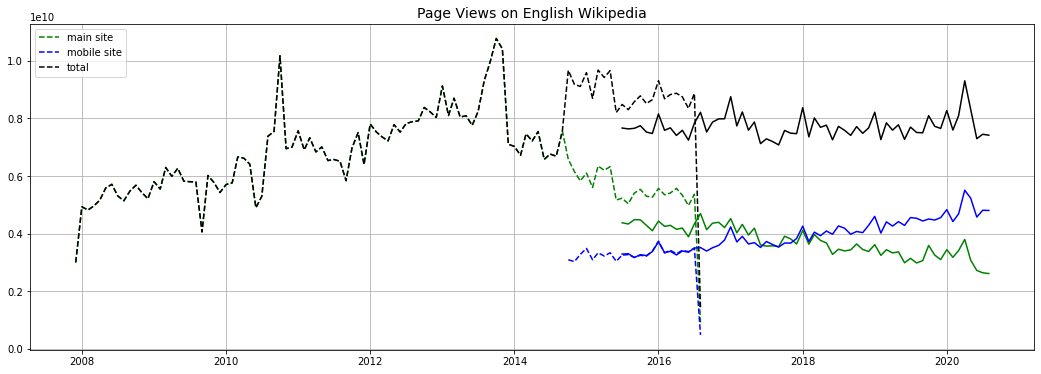

In [27]:
# Plot the pageviews data against time
plt.figure(figsize=[18,6])
plt.plot(df['timestamp'], df['pagecount_desktop_views'], c='green', linestyle='dashed', label='main site')
plt.plot(df['timestamp'], df['pagecount_mobile_views'], c='blue', linestyle='dashed', label='mobile site')
plt.plot(df['timestamp'], df['pagecount_all_views'], c='black', linestyle='dashed', label='total')
plt.plot(df['timestamp'], df['pageview_desktop_views'], c='green')
plt.plot(df['timestamp'], df['pageview_mobile_views'], c='blue')
plt.plot(df['timestamp'], df['pageview_all_views'], c='black')
# Create a legend to decode access type by color
plt.legend(loc='upper left')
# Add title and gridlines to the figure
plt.title("Page Views on English Wikipedia", fontsize=14)
plt.grid(which='major', axis='both')
# Save the figure to a .png file
plt.savefig("PageviewsOnEnglishWikipedia.png")